In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import transactionencoder

In [2]:
# Data Preperation:-
## df= pd.read_csv('data.csv')

# Data Preperation:-
df = pd.read_csv('data.csv', encoding='latin-1') # Try 'latin-1' encoding
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Data Cleaning and Preprocessing**

In [3]:
# Removing leading/trailing spaces
df['Description'] = df['Description'].str.strip()

# Dropping raws without invoice numbers
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Converting invoice numbers to strings
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Removing credit transactions:-
df = df[~df['InvoiceNo'].str.contains('C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Creating a list of Transactions (each Transaction is a list of items):-
basket = (df[df['Country']=="France"]
          .groupby(['InvoiceNo','Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Converting all positive values to 1 (presence of item) and others to 0 (absence of item):-
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Frequent Itemset Mining (Apriori)**

In [6]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Association Rule Generation**

In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Rules Evaluation and Filtering**

In [8]:
# Sort rules by confidence in descending order:-
rules= rules.sort_values(by='confidence', ascending= False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Filtering rules by Confidence and Lift:
filtered_rules = rules[(rules['lift'] >= 1) &
                       (rules['confidence'] >= 0.5)]
print(filtered_rules.to_markdown(index=False, numalign="left", stralign="left"))

| antecedents                                                                        | consequents                                                                        | antecedent support   | consequent support   | support   | confidence   | lift    | leverage   | conviction   | zhangs_metric   |
|:-----------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------|:---------------------|:---------------------|:----------|:-------------|:--------|:-----------|:-------------|:----------------|
| frozenset({'SET/6 RED SPOTTY PAPER CUPS', 'SET/20 RED RETROSPOT PAPER NAPKINS'})   | frozenset({'SET/6 RED SPOTTY PAPER PLATES'})                                       | 0.102041             | 0.127551             | 0.0994898 | 0.975        | 7.644   | 0.0864744  | 34.898       | 0.967949        |
| frozenset({'SET/6 RED SPOTTY PAPER PLATES', 'SET/20 RED RETROSPOT PAPER NAPKINS'}) | frozenset(

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualizing Network Graph**

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate node positions using a layout algorithm (e.g., spring layout)
pos = nx.spring_layout(G)  # Add this line to calculate node positions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Creating a grapgh from the filtered rules:-
G = nx.DiGraph()
for i, row in filtered_rules.iterrows():
  G.add_edge(row['antecedents'], row['consequents'], weight= row['lift'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


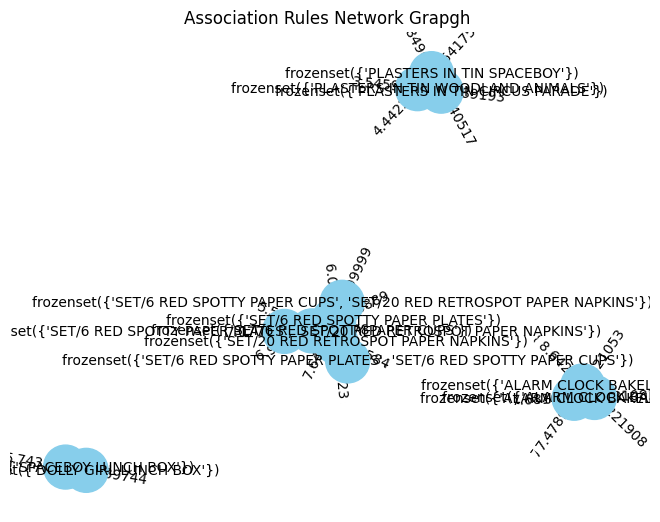

In [15]:
# Fix: Extract node values, handle non-numeric types, and ensure a non-empty list
node_sizes = [float(v) * 1000 if isinstance(v, (int, float)) else 1000
              for v in dict(G.nodes).values()]
nx.draw(G, pos, with_labels=True, node_size=node_sizes,
        node_color='skyblue', font_size=10, font_color='black',
        width=[d['weight'] / 2 for (u, v, d) in G.edges(data= True)])

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels= edge_labels)
plt.title('Association Rules Network Grapgh ')
plt.show()

**Validation**

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test= train_test_split(basket_sets, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Evaluateing the Association Rules on the Test set(X_test):

for _, row in filtered_rules.iterrows():
  antecedent = list(row['antecedents'])
  consequent = list(row['consequents'])
  support_test = X_test[X_test[antecedent].all(axis=1)][consequent].all(axis=1).mean()
  print(f"Rule: {antecedent} -> {consequent}, Support on Test Set: {support_test: .2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule: ['SET/6 RED SPOTTY PAPER CUPS', 'SET/20 RED RETROSPOT PAPER NAPKINS'] -> ['SET/6 RED SPOTTY PAPER PLATES'], Support on Test Set:  1.00
Rule: ['SET/6 RED SPOTTY PAPER PLATES', 'SET/20 RED RETROSPOT PAPER NAPKINS'] -> ['SET/6 RED SPOTTY PAPER CUPS'], Support on Test Set:  1.00
Rule: ['SET/6 RED SPOTTY PAPER PLATES'] -> ['SET/6 RED SPOTTY PAPER CUPS'], Support on Test Set:  0.92
Rule: ['SET/6 RED SPOTTY PAPER CUPS'] -> ['SET/6 RED SPOTTY PAPER PLATES'], Support on Test Set:  0.92
Rule: ['ALARM CLOCK BAKELIKE RED'] -> ['ALARM CLOCK BAKELIKE GREEN'], Support on Test Set:  1.00
Rule: ['ALARM CLOCK BAKELIKE GREEN'] -> ['ALARM CLOCK BAKELIKE RED'], Support on Test Set:  0.83
Rule: ['SET/6 RED SPOTTY PAPER PLATES', 'SET/6 RED SPOTTY PAPER CUPS'] -> ['SET/20 RED RETROSPOT PAPER NAPKINS'], Support on Test Set:  0.91
Rule: ['SET/6 RED SPOTTY PAPER PLATES'] -> ['SET/20 RED RETROSPOT PAPER NAPKINS'], Support on Test Set:  0.83
Rule: ['ALARM CLOCK BAKELIKE RED'] -> ['ALARM CLOCK BAKELIKE PINK']

In [19]:
from sklearn.model_selection import KFold

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Initializing k-fold cross-validation:-
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrices to track:-
total_support = []
total_confidence = []
total_lift= []
rule_counts = []

# Cross-validation loop:
for train_index, test_index in kf.split(basket_sets):
  X_train, X_test = basket_sets.iloc[train_index], basket_sets.iloc[test_index]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Rule Evaluation on Test Data:-
for _, rule in rules.iterrows():
  antecedent = set(rule['antecedents'])
  consequent = set(rule['consequents'])

  # Check if the rule applies to any transaction in the test set
  rule_applicable= X_test[(X_test[list(antecedent)]==1).all(axis=1)]
  rule_match = rule_applicable[(rule_applicable[list(consequent)]==1).all(axis=1)]

  # Calculating Support, Confidence and Lift for the rule on Test Set:-
  support_test = len(rule_match)/ len(X_test)
  confidence_test = len(rule_match)/ len(rule_applicable) if len(rule_applicable)>0 else 0

  # Convert the consequent column to numeric type before calculating the sum
  X_test_numeric = X_test[list(consequent)].apply(pd.to_numeric, errors='coerce') # to avoid unsupported oprand error
  lift_test = confidence_test/ (X_test_numeric.sum() / len(X_test))

  total_support.append(support_test)
  total_confidence.append(confidence_test)
  total_lift.append(lift_test)

rule_counts.append(len(rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import numpy as np
# Summarize Cross-Validation Results
print(f"Average Support: {np.mean(total_support):.4f}")
print(f"Average Confidence: {np.mean(total_confidence):.4f}")

print(f"Average Number of Rules: {np.mean(rule_counts):.2f}")

Average Support: 0.1045
Average Confidence: 0.7416
Average Number of Rules: 26.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average Support: 0.1045

* Interpretation: This means that, on average, the itemsets involved in our association rules appear together in about 10.45% of the transactions across all folds of our dataset.
* Implication: This indicates that the rules I have discovered capture associations that are not extremely rare but also not universally common. They represent patterns that occur with a moderate frequency in our customer's purchasing behavior.





Average Confidence: 0.7416

* Interpretation: On average, when the antecedent itemset (the "if" part of the rule) is present in a transaction, there is a 74.16% probability that the consequent itemset (the "then" part of the rule) will also be present.
* Implication: This suggests that our rules have a reasonably high predictive power. If a customer buys the items in the antecedent, there's a good chance they'll also buy the items in the consequent.

Average Number of Rules: 26.00

* Interpretation: On average, the model generates 26 association rules per cross-validation fold.
* Implication: This tells that the approximate number of potentially interesting relationships the model is identifying in the data. However, remember that the number of rules alone doesn't indicate quality. We will need to evaluate the rules based on support, confidence, lift, and their relevance to the business goals.

Based on these results:

* The model seems to be doing a decent job of identifying associations between items.
* The average confidence and lift values are promising.
* The average support suggests that the rules are capturing patterns that are frequent enough to be potentially useful.

* We have a good starting point for further analysis and decision-making. We can now examine the specific rules generated, prioritize the most interesting ones, and consider how to leverage them for product recommendations, store layout optimization, or other business strategies.